# Prompt

**Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository 
here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”**

In [2]:
# import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.options.mode.chained_assignment = None

# 1

**First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!**

In the data dictionary, there are descriptions of 22 attributes. There is so simple or obvious correlation between any of these attributes to determine edibility.

# 2
**Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.** 

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

# 3 

**Add meaningful names for each column.**

The existing column names aren't meaningful. I'm renaming the columns according to what I found in the data dictionary.

In [6]:
df.columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises','odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
              'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
              'spore-print-color', 'population', 'habitat']

In addition to the poisonous and odor columns, I am including cap-shape, cap-surface, cap-color, and gill-color.

In [7]:
subset = df[['poisonous', 'cap-shape', 'cap-surface', 'cap-color','odor', 'gill-color']]

In [8]:
subset

,poisonous,cap-shape,cap-surface,cap-color,odor,gill-color
0,e,x,s,y,a,k
1,e,b,s,w,l,n
2,p,x,y,w,p,n
3,e,x,s,g,n,k
4,e,x,y,y,a,n
...,...,...,...,...,...,...
8118,e,k,s,n,n,y
8119,e,x,s,n,n,y
8120,e,f,s,n,n,n
8121,p,k,y,n,y,b


In [9]:
subset.isnull().sum()

poisonous      0
cap-shape      0
cap-surface    0
cap-color      0
odor           0
gill-color     0
dtype: int64

There are no null values in this subset. I will replace the codes with the corresponding values found in the data dictionary.

In [10]:
subset['poisonous'] = subset['poisonous'].replace(['e','p'],['edible','poisonous'])
subset['cap-shape'] = subset['cap-shape'].replace(['b','c', 'x', 'f', 'k', 's'],['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'])
subset['cap-surface'] = subset['cap-surface'].replace(['f','g', 'y', 's'],['fibrous', 'grooves', 'scaly', 'smooth'])
subset['cap-color'] = subset['cap-color'].replace(['n','b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 
                                                                                                     'white', 'yellow'])
subset['odor'] = subset['odor'].replace(['a','l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],['almond', 'anise', 'creosote', 'fishy','foul', 'musty','none','pungent','spicy'])
subset['gill-color'] = subset['gill-color'].replace(['k','n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange',
                                                                                                                 'pink', 'purple', 'red', 'white', 'yellow'])

In [11]:
subset

,poisonous,cap-shape,cap-surface,cap-color,odor,gill-color
0,edible,convex,smooth,yellow,almond,black
1,edible,bell,smooth,white,anise,brown
2,poisonous,convex,scaly,white,pungent,brown
3,edible,convex,smooth,gray,none,black
4,edible,convex,scaly,yellow,almond,brown
...,...,...,...,...,...,...
8118,edible,knobbed,smooth,brown,none,yellow
8119,edible,convex,smooth,brown,none,yellow
8120,edible,flat,smooth,brown,none,brown
8121,poisonous,knobbed,scaly,brown,fishy,buff


# 4

**Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.**

Using labelencoder, I will assign a code to each category of each attribute.

In [12]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
subset['poisonous_cat'] = labelencoder.fit_transform(subset['poisonous'])
subset['cap-shape_cat'] = labelencoder.fit_transform(subset['cap-shape'])
subset['cap-surface_cat'] = labelencoder.fit_transform(subset['cap-surface'])
subset['cap-color_cat'] = labelencoder.fit_transform(subset['cap-color'])
subset['odor_cat'] = labelencoder.fit_transform(subset['odor'])
subset['gill-color_cat'] = labelencoder.fit_transform(subset['gill-color'])
subset

,poisonous,cap-shape,cap-surface,cap-color,odor,gill-color,poisonous_cat,cap-shape_cat,cap-surface_cat,cap-color_cat,odor_cat,gill-color_cat
0,edible,convex,smooth,yellow,almond,black,0,2,3,9,0,0
1,edible,bell,smooth,white,anise,brown,0,0,3,8,1,1
2,poisonous,convex,scaly,white,pungent,brown,1,2,2,8,7,1
3,edible,convex,smooth,gray,none,black,0,2,3,3,6,0
4,edible,convex,scaly,yellow,almond,brown,0,2,2,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8118,edible,knobbed,smooth,brown,none,yellow,0,4,3,0,6,11
8119,edible,convex,smooth,brown,none,yellow,0,2,3,0,6,11
8120,edible,flat,smooth,brown,none,brown,0,3,3,0,6,1
8121,poisonous,knobbed,scaly,brown,fishy,buff,1,4,2,0,3,2


# 5

**Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.**

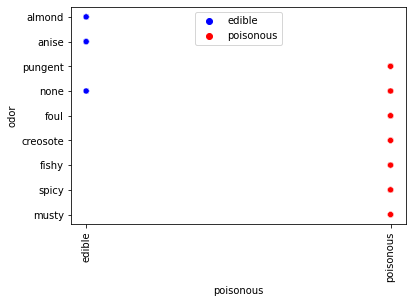

In [13]:
sns.scatterplot(
    x='poisonous',
    y='odor',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

There is a correlation among poisonous mushrooms with mal odor. The chart below shows this same relationship with value counts.

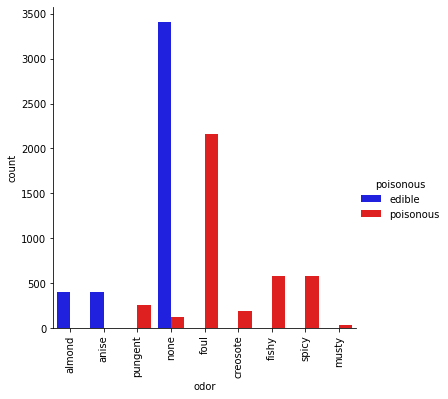

In [14]:
sns.catplot(x ="odor", hue ="poisonous", 
kind ="count", data = subset, palette=['blue','red'])
plt.xticks(rotation=90);

Show below, the attributes I explore do not, as strongly, indicate poisonous or edible.

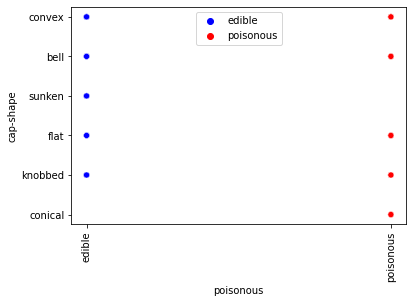

In [15]:
sns.scatterplot(
    x='poisonous',
    y='cap-shape',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

Shown above, a sunken cap shape seems to indicate edible. Shown below, grooves in the cap surface seems to indicate poisonous.

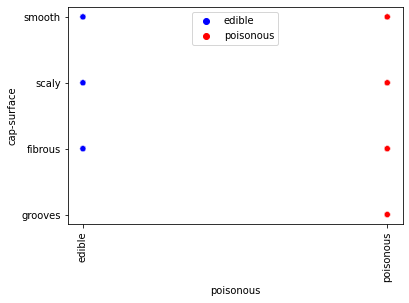

In [16]:
sns.scatterplot(
    x='poisonous',
    y='cap-surface',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

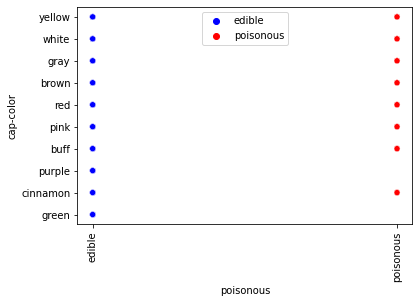

In [17]:
sns.scatterplot(
    x='poisonous',
    y='cap-color',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

Shown above, cap color is not a reliable indicator, except in the case of purple caps, which appear to indicate edible. Shown below, red gills appear to indicate edible, and buff and green gills indicate poisonous.

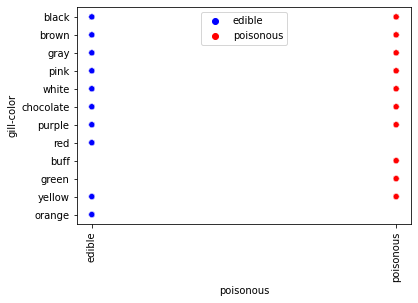

In [18]:
sns.scatterplot(
    x='poisonous',
    y='gill-color',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

# 6

**Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.**

It might be helpful to consider a combination of attributes as a method of determining edibility. In the chart that shows the relationship between odor and edibility, the absence of odor did not indicate edibility. However, shown below it appears that unless the gills are green, the absence of odor suggests edibility. 

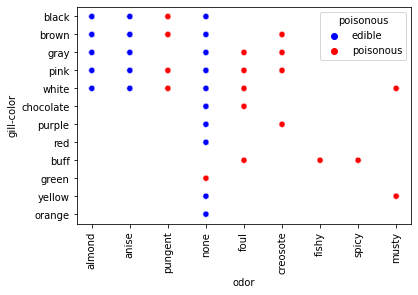

In [19]:
sns.scatterplot(
    x='odor',
    y='gill-color',
    hue='poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90);